In [6]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt

"""
Load AirQualityUCI Data
"""

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

input_file = 'AirQualityUCI_refined.csv'

df = pd.read_csv(input_file,
                 index_col=[0],
                 parse_dates=[0],
                 date_parser=parser)

df.head()

C:\Users\lejeo\AppData\Local\Temp/ipykernel_11496/4122421229.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,0.7578,11.9
2004-03-10 19:00:00,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,0.7255,9.4
2004-03-10 20:00:00,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,0.7502,9.0
2004-03-10 21:00:00,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,0.7867,9.2
2004-03-10 22:00:00,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,0.7888,6.5


<AxesSubplot:xlabel='Datetime'>

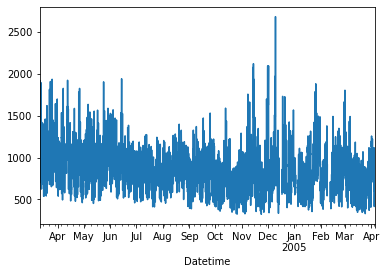

In [7]:
# Visualize the 'PT08.S3(NOx)' variable
df['PT08.S3(NOx)'].plot()

In [8]:
# Linear interpolation
NOx=df['PT08.S3(NOx)'].interpolate().copy()

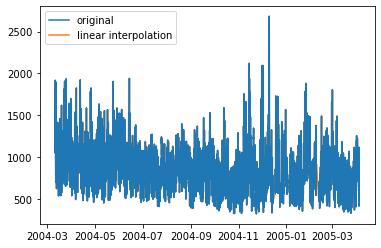

In [9]:
# Visualize original and imputed data
plt.plot(df['PT08.S3(NOx)'], label='original', zorder=2)
plt.plot(NOx, label='linear interpolation', zorder=1)
plt.legend(loc='best')

Text(0.5, 0, 'PT08.S3(NOx)')

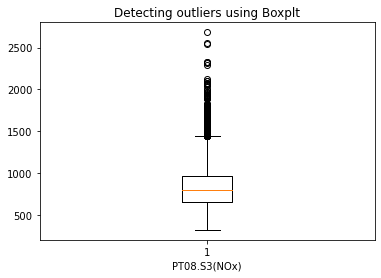

In [10]:
# Detecting outliers using Boxplot
plt.boxplot(NOx)
plt.title("Detecting outliers using Boxplt")
plt.xlabel('PT08.S3(NOx)')

In [11]:
# Calculate correlations between variables
corr_matrix = df.corr()
corr_matrix

,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
CO(GT),1.000000,0.877203,0.914973,0.792557,-0.701703,0.679262,0.639470,0.851403,0.040218,0.065809,0.845144
PT08.S1(CO),0.877203,1.000000,0.892964,0.713654,-0.771938,0.641529,0.682881,0.899324,0.114606,0.135324,0.883795
PT08.S2(NMHC),0.914973,0.892964,1.000000,0.704435,-0.796703,0.646245,0.777254,0.880578,-0.090380,0.186933,0.981950
NOx(GT),0.792557,0.713654,0.704435,1.000000,-0.655707,0.763111,0.233731,0.787046,0.221032,-0.149323,0.626638
PT08.S3(NOx),-0.701703,-0.771938,-0.796703,-0.655707,1.000000,-0.652083,-0.538468,-0.796569,-0.056740,-0.232017,-0.735744
NO2(GT),0.679262,0.641529,0.646245,0.763111,-0.652083,1.000000,0.157360,0.708128,-0.091759,-0.335022,0.544039
PT08.S4(NO2),0.639470,0.682881,0.777254,0.233731,-0.538468,0.157360,1.000000,0.591144,-0.032188,0.629641,0.765731
PT08.S5(O3),0.851403,0.899324,0.880578,0.787046,-0.796569,0.708128,0.591144,1.000000,0.124956,0.070751,0.865689
RH,0.040218,0.114606,-0.090380,0.221032,-0.056740,-0.091759,-0.032188,0.124956,1.000000,0.167971,-0.061681
AH,0.065809,0.135324,0.186933,-0.149323,-0.232017,-0.335022,0.629641,0.070751,0.167971,1.000000,0.167972


Text(0.5, 1.0, 'Detecting outliers using Boxplot')

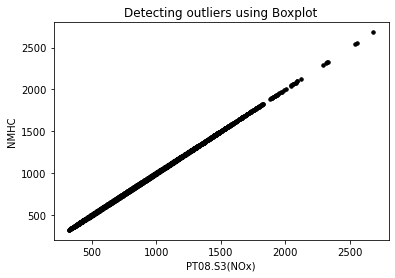

In [12]:
# Choose the least correlated variable
nmhc = df['PT08.S3(NOx)'].copy().interpolate() 

# Visualize a scatter plot(CO, NMHC)
plt.scatter(NOx, nmhc, s=12, c='black')
plt.xlabel('PT08.S3(NOx)')
plt.ylabel('NMHC')
plt.title("Detecting outliers using Boxplot")

In [13]:
"""
IQR-based Outlier Detection
"""

# Q1, Q2(median), Q3
q1 = NOx.quantile(0.25) #upper 25%
median = NOx.quantile(0.5)
q3 = NOx.quantile(0.75)
print(q1, median, q3)

654.0 804.0 968.0


In [14]:
# IQR, upper_fence, lower_fence
iqr = q3-q1
upper_fence = q3 + 1.5*iqr
lower_fence = q1 - 1.5*iqr
print(iqr,upper_fence, lower_fence)

314.0 1439.0 183.0


In [15]:
# Filtering the outliers
outliers = NOx.loc[(NOx > upper_fence) | (NOx < 0)]
outliers

Datetime
2004-03-11 00:00:00    1462.0
2004-03-11 01:00:00    1453.0
2004-03-11 02:00:00    1579.0
2004-03-11 03:00:00    1705.0
2004-03-11 04:00:00    1818.0
                        ...  
2005-03-01 03:00:00    1791.0
2005-03-01 04:00:00    1804.0
2005-03-01 05:00:00    1727.0
2005-03-01 06:00:00    1677.0
2005-03-07 04:00:00    1490.0
Name: PT08.S3(NOx), Length: 239, dtype: float64

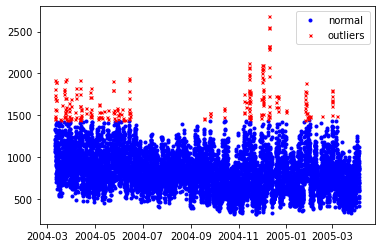

In [16]:
# Mask for outliers
mask = NOx.index.isin(outliers.index)
mask[:50]

# Visualize the normal data and outliers ~: not
plt.plot(NOx[~mask], label='normal', color='blue',
    marker='o', markersize=3, linestyle='None')
plt.plot(outliers, label='outliers', color='red',
    marker='x', markersize=3, linestyle='None')
plt.legend(loc='best')

In [17]:
# Removing the outliers
NOx_refined = NOx.copy()
NOx_refined[mask] = np.nan
print(NOx_refined[mask])

Datetime
2004-03-11 00:00:00   NaN
2004-03-11 01:00:00   NaN
2004-03-11 02:00:00   NaN
2004-03-11 03:00:00   NaN
2004-03-11 04:00:00   NaN
                       ..
2005-03-01 03:00:00   NaN
2005-03-01 04:00:00   NaN
2005-03-01 05:00:00   NaN
2005-03-01 06:00:00   NaN
2005-03-07 04:00:00   NaN
Name: PT08.S3(NOx), Length: 239, dtype: float64


<AxesSubplot:xlabel='Datetime'>

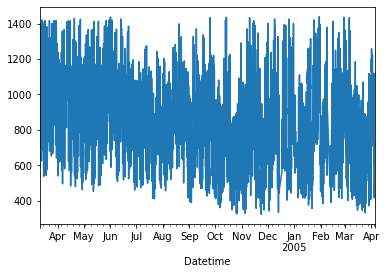

In [18]:
# Linear interpolation for reconstructing outliers removed.
NOx_refined.interpolate(inplace = True)
NOx_refined.plot()

C:\Users\lejeo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PT08.S3(NOx)', ylabel='Density'>

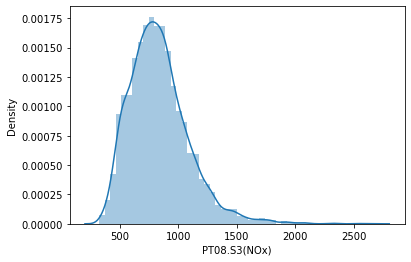

In [19]:
"""
Detecting Outliers with Z-Scores
"""

# Visualize the distribution of the 'PT08.S3(NOx)' variable
import seaborn as sns

sns.distplot(NOx)

In [20]:
# Mean, Standard deviation
mean = np.mean(NOx)
std = np.std(NOx)
print(mean,std)

832.7588970823982 255.69616900657363


In [21]:
# Calculate Z-scores for each data points
outliers = []
thres = 3 # Z-score threshold
for i in NOx:
    z_score = (i-mean) / std
    if (np.abs(z_score) > thres):
        print(z_score)
        outliers.append(i)

3.4112404042126165
3.8531711552247483
4.244260315412475
3.5402998270745667
3.3134681141656848
4.146488025365544
4.154309808569298
3.3330225721750715
3.0788146180530487
3.833616697215362
3.6106958759083576
3.7280226239646757
3.395596837805108
4.205151399393703
3.419062187416371
4.310745472644389
3.0162403524230124
3.168765124896226
3.051438376839908
3.387775054601353
3.5833196346952167
3.8844582880397667
3.4112404042126165
3.0592601600436624
3.8688147216322575
4.2638147734218625
3.6106958759083576
3.051438376839908
3.716289949159044
3.462081995037021
3.4777255614445304
3.8844582880397667
3.137477992081208
3.098369076062435
3.8101513476040982
4.189507832986194
3.794507781196589
3.763220648381571
4.334210822255653
4.240349423810598
3.4034186210088624
3.6146067675102347
3.254804740137526
3.0045076776173807
3.2469829569337714
3.168765124896226
3.6693592499365164
4.8660920801109615
4.807428706082803
4.424161329098831
3.7553988651778165
3.2508938485356484
3.4542602118332666
5.038171310593562


In [25]:
# Mask for outliers
mask = NOx.index.isin([outliers.index])
mask[:50]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

C:\Users\lejeo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lejeo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


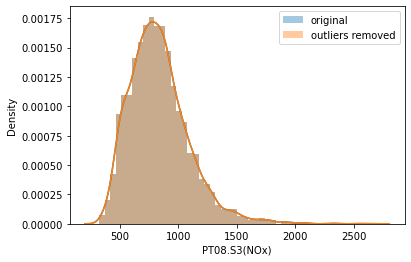

In [26]:
# Comparison of distributions before/after outlier removal
sns.distplot(NOx, axlabel='PT08.S3(NOx)', label='original')
sns.distplot(NOx[~mask], label='outliers removed')
plt.legend(loc='best')

# [exer] Adjust thres

<AxesSubplot:xlabel='Datetime'>

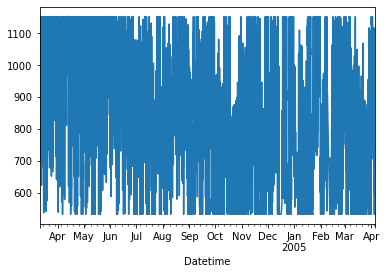

In [29]:
# Flooring and Capping
floor = NOx.quantile(0.1)
cap = NOx.quantile(0.9)
NOx.loc[NOx < floor] = floor
NOx.loc[NOx > cap] = cap

# Visualize the result
NOx.plot()